# Dash-n-Dave NLP Project
## The GitHub Repo Prediction Debacle

In [1]:
# Standard Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Natural Language Tool Kit, Regex, unicodedata for manipulation of language
import nltk
import unicodedata
import re
# Our code specific for this project
from prepare import git_df
from acquire import git_data
from explore import code_language, other_languages, word_counts, chances, top_20_percentages
# Text/Display Formatting
from formating import bold, display, Latex, Markdown, percent, Percent, strike, underline
# Spell Checking and Visualization
from textblob import TextBlob
from wordcloud import WordCloud
import PIL
import os
# plt presets
plt.rc('figure', figsize=(13, 10))
font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 16}
plt.rc('font', **font)
plt.style.use('seaborn-darkgrid')

# Acquire
- <b>To aquire the Data We used the Scripts in aquire.py</b>
- <b>We Used requests.get to scrape the github repos</b>
- <b>We used BeautifulSoup to get the titles of the repos, the language, and all text from the Readme files</b>
- <b>This took some time because github kept throttling our acquisition!</b>

In [2]:
df = git_data(df=True)
df.head()

,language,readme_contents
repo,,
0voice/interview_internal_reference,Python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...
2dust/v2rayN,C#,"# v2rayN\nA V2Ray client for Windows, support ..."
30-seconds/30-seconds-of-code,JavaScript,[![Logo](/logo.png)](https://30secondsofcode.o...
521xueweihan/HelloGitHub,Python,"<p align=""center"">\n <img src=""https://cdn.js..."
Airblader/i3,C,[![Build Status](https://github.com/Airblader/...


# Prepare
- <b>To Prepare our Data we used our prepare.py file and created different versions of clean->cleaner data</b>

In [3]:
df = git_df()

In [4]:
df[df.language.isnull() == True]

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean


In [5]:
df.head(1)

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0voice/interview_internal_reference,Python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,attached storage ping ping hive hive static fl...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             600 non-null    object
 1   language         600 non-null    object
 2   original         600 non-null    object
 3   clean            600 non-null    object
 4   stemmed          600 non-null    object
 5   lemmatized       600 non-null    object
 6   original_length  600 non-null    int64 
 7   true_clean       600 non-null    object
dtypes: int64(1), object(7)
memory usage: 37.6+ KB


### No non nulls in the finished dataframe!!
- Let's split this to ask some real questions

In [7]:
df.language.unique()

array(['Python', 'C#', 'JavaScript', 'C', 'C++', 'Java', 'PHP',
       'Jupyter Notebook', 'HTML', 'TypeScript'], dtype=object)

In [8]:
df = other_languages(df)

In [9]:
df.language.unique()

array(['Python', 'Other', 'C', 'C++', 'PHP', 'HTML'], dtype=object)

## What is the probability of guessing one right if we know nothing other than the categories?
- $1/6$ 

In [10]:
percent(1/6)

16.67%

## What is the probability of guessing correctly if we use the probability from our sample?
- Gotta split this data up first, however I will be stratifying by the language, so the approximate proportions should be similar


In [11]:
from prepare import split_data

In [12]:
train, validate, test = split_data(df, 'language')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 347 to 211
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             360 non-null    object
 1   language         360 non-null    object
 2   original         360 non-null    object
 3   clean            360 non-null    object
 4   stemmed          360 non-null    object
 5   lemmatized       360 non-null    object
 6   original_length  360 non-null    int64 
 7   true_clean       360 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.3+ KB


### Great! Looks like we have a good Training set with 360 rows


In [14]:
train.language.value_counts()

C++       65
Python    64
PHP       64
C         61
Other     56
HTML      50
Name: language, dtype: int64

In [15]:
lang_vcs = train.language.value_counts()

In [16]:
lang_vcs.sum()

360

In [17]:
chances(lang_vcs)

 For C++, there's a 18.06% chance of that being correct
 For Python, there's a 17.78% chance of that being correct
 For PHP, there's a 17.78% chance of that being correct
 For C, there's a 16.94% chance of that being correct
 For Other, there's a 15.56% chance of that being correct
 For HTML, there's a 13.89% chance of that being correct


Best Guess:  C̲+̲+̲, which gives us a 1̲8̲%̲ chance of being correct.


# Baseline: 18% Accuracy
- Let's make a language bank from our code_language class to do some exploration

In [18]:
lb = code_language.make_language_bank(train)

In [19]:
lb['C'].label

'C'

In [20]:
###----  Only run this cell if you  ----###
###----  want to see all the words  ----###
###----  in the readme's of all the ----###
###----       C repostiories        ----###

# lb['C'].words

In [21]:
lb['Python'].freq()

python          1393
file             661
code             546
star             527
model            405
                ... 
axiom              1
acknowledge        1
citizen            1
bureaucratic       1
ridge              1
Length: 4568, dtype: int64

In [22]:
all_word_counts = word_counts(lb)
all_word_counts.head(10)

,python,html,c,c++,php,other,all
python,1393,20,45,185,33,133,1809
file,661,122,316,227,198,166,1690
code,546,155,198,211,149,301,1560
star,527,11,2,6,8,9,563
model,405,46,15,62,71,190,789
image,375,72,33,44,26,118,668
install,340,66,201,229,78,127,1041
data,320,214,161,89,63,279,1126
version,305,63,205,222,160,121,1076
video,302,162,19,25,13,31,552


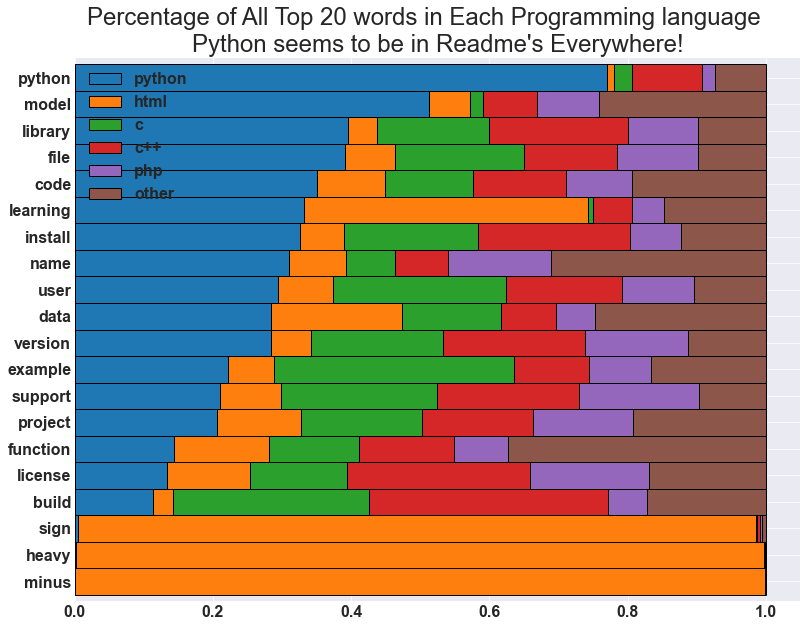

In [23]:
top_20_percentages(lb)

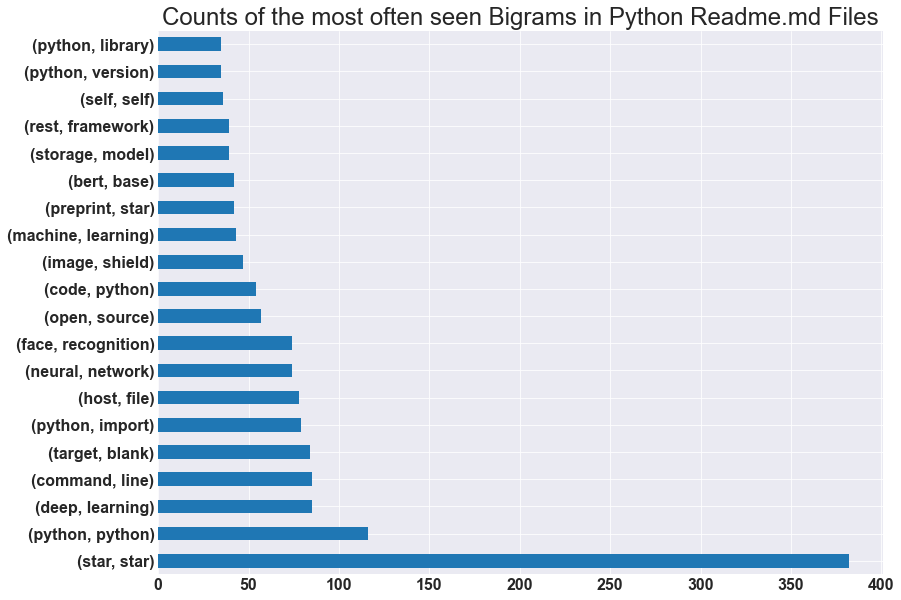

In [24]:
lb['Python'].bigrams().value_counts(ascending=False).head(20).plot.barh()
plt.title('Counts of the most often seen Bigrams in Python Readme.md Files',
         fontsize = 24)
plt.show()

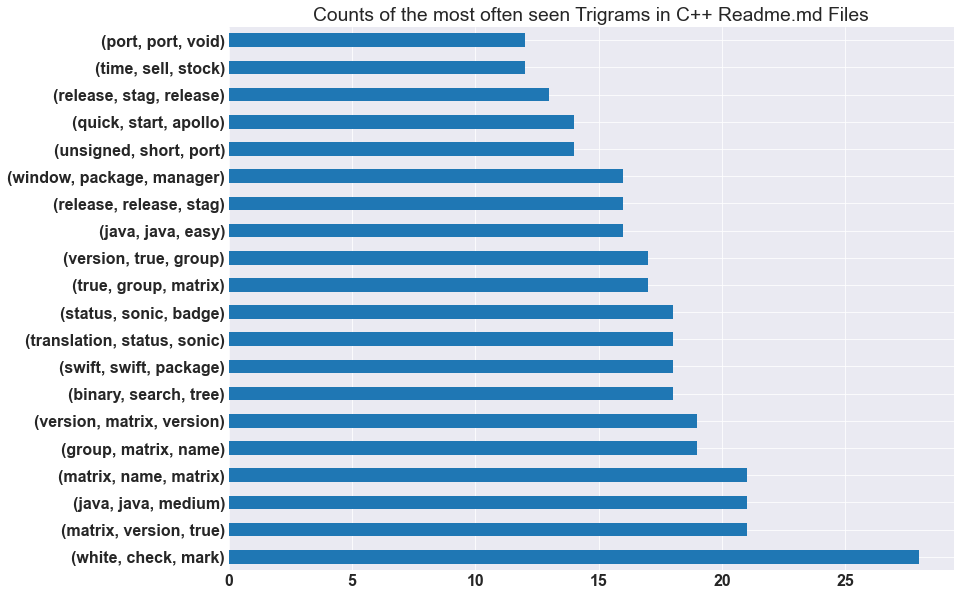

In [25]:
lb['C++'].trigrams().value_counts(ascending=False).head(20).plot.barh()
plt.title('Counts of the most often seen Trigrams in C++ Readme.md Files')
plt.show()

## Just for fun, Let's try a couple of WordClouds
<div class="alert alert-box alert-info">
    <b>Python</b>
    </div>

![WordCloud for Python](https://raw.githubusercontent.com/Dash-n-Dave-NLP/Project-Dave/main/py_final.PNG)

<div class="alert alert-box alert-info">
    <b>PHP</b>
    </div>
    
![for PHP](https://raw.githubusercontent.com/Dash-n-Dave-NLP/Project-Dave/main/php_final.PNG)

<div class="alert alert-box alert-info">
    <b>C</b>
    </div>
    
![for C](https://raw.githubusercontent.com/Dash-n-Dave-NLP/Project-Dave/main/c_final.PNG)

# Modeling

### Let's use the Count Vectorizer from sklearn to make a bag of words

In [26]:
# lb['All'].words

'flash java lightweight worker take modern browser latest edge latest chrome latest latest safari work mobile version feature ping jitter address distance server optional telemetry optional result optional multiple point test optional server requirement reasonably fast server apache also also available store test result optional also fast connection installation video quick start installation guide server android template build android client installation available android docker docker image available docker registry docker docker available node partial node available node branch moment donate donate donate license copyright program free redistribute modify term lesser general public license free foundation either version license option later version program distributed hope useful without warranty without even warranty fitness particular purpose general public license detail received copy lesser general public license along program dapper simple object mapper build status release not

In [27]:
ADDITIONAL_STOPWORDS = ['yes']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [28]:
all_words = clean(lb['All'].words)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

# same basic process as any sklearn transformation:
# make the thing
cv = CountVectorizer()
# use the thing
bag_of_words = cv.fit_transform([word for word in all_words])

In [30]:
# Gotta make that sparse thing dense if it's going in a DataFrame
bow = pd.DataFrame(bag_of_words.todense())
bow.columns = cv.get_feature_names_out()

### And We can use the Tfid Vectorizer to fit and Transform our training set

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Make it
tfidf = TfidfVectorizer()
# Use it to fit and transform our data
bag_of_words = tfidf.fit_transform(train.true_clean)


In [32]:
# zip: put these two things of the same length together
# dict: turn those two associated things into a k: v pair
# pd.Series: turn those keys into indeces, and the values into values
pd.Series(
    dict(
        zip(
            tfidf.get_feature_names_out(), tfidf.idf_)))

aaron        5.502584
abacus       6.195731
abandoned    5.790266
abase        6.195731
abate        6.195731
               ...   
zero         3.392370
zigzag       5.790266
zing         5.790266
zone         4.691653
zoom         6.195731
Length: 7285, dtype: float64

In [33]:
cv = CountVectorizer(ngram_range=(2, 2))
bag_of_grams = cv.fit_transform(train.true_clean)

In [34]:
X_train = train.true_clean
y_train = train.language
X_validate = validate.true_clean
y_validate = validate.language
X_test = test.true_clean
y_test = test.language

In [35]:
# We made a model.py file!
import model

## Performance
- <b>The Best Performing Model was the Logistic Regression Model
- <b>We Achieved 55% Accuracy on Validation Data
- <b>And Then a 57% Accuracy on the Test Data

In [36]:
# Whatever transformations we apply to X_train need to be applied to X_test

tfidf = TfidfVectorizer(ngram_range=(2, 3), min_df=1, max_df=0.1, max_features=None)
X_bow = tfidf.fit_transform(X_train)
X_validate_bow = tfidf.transform(X_validate)

In [37]:
model.log_model_balanced(X_bow, y_train, X_validate_bow, y_validate)

Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.98
              precision    recall  f1-score   support

           C       1.00      0.97      0.98        61
         C++       0.92      1.00      0.96        65
        HTML       1.00      0.98      0.99        50
       Other       1.00      0.98      0.99        56
         PHP       1.00      1.00      1.00        64
      Python       1.00      0.97      0.98        64

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy of Logistic Regression classifier on validate set: 0.55


In [38]:
X_test = test.true_clean
y_test = test.language
X_test_bow = tfidf.transform(X_test)

In [39]:
model.test_log_balanced(X_bow, y_train, X_test_bow, y_test)

Accuracy of Logistic Regression classifier on training set: 0.98
              precision    recall  f1-score   support

           C       1.00      0.97      0.98        61
         C++       0.92      1.00      0.96        65
        HTML       1.00      0.98      0.99        50
       Other       1.00      0.98      0.99        56
         PHP       1.00      1.00      1.00        64
      Python       1.00      0.97      0.98        64

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy of Logistic Regression classifier on test set:     0.57
              precision    recall  f1-score   support

           C       0.76      0.65      0.70        20
         C++       0.39      0.62      0.48        21
        HTML       0.62      0.29      0.40        17
       Other       0.56      0.53      0.54        19
         PHP       1.00      0.73      0.84        22
  

# Conclusion

- <b>We set out to see if we could increase our ability to predict the Programing Language of a github Repo by looking at their Readme files</b>
- <b>We established a Baseline of 18% Acc. and increased to 56% Acc. on out of training data</b>

## Next Steps

- <b>We want to do more with our Data Engineering:</b>
  - <b>Trying to isolate the most common words from everything and get rid of them</b>
  - <b>Making sure we are not eliminating words or urls that may be Programing language specific</b>
  - <b>Procure a larger sample that has a proper representation of the Population</b>
- <b>Additional Lifting Power:</b>
  - <b>We want to use the API Key we aquired for GPT-3 to summarize the Readme information</b>
  - <b>If the different languages have similar themes, the transformed information could give us more information</b>